<a href="https://colab.research.google.com/github/Ice-CreamAT/DataScienceForCancer/blob/main/DataScienceForCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT THE LIBS**

In [13]:
!pip install chembl_webresource_client

In [14]:
!pip install rdkit

In [15]:
!pip -q install rdkit-pypi

In [47]:
# Standard Libs
import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bioinformathic and Cheminformatics Libs
from chembl_webresource_client import new_client
from rdkit import Chem, RDLogger
from rdkit.Chem import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools

sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

#**EXAMPLE**

In [17]:
dataset = pd.read_csv("CompostosChEMBL.csv", encoding="ISO-8859-1",
                      sep=";", header=0)
dataset

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key
0,CHEMBL1868702,GESTRINONE,A 46 745|A-46-745|A-46745|DIMETRIOSE|GESTRINON...,Small molecule,4.0,308.42,19.0,61.0,3.72,37.30,...,23,2,1,0,308.1776,1.86,NEUTRAL,C21H24O2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3C=...,BJJXHLWLUDYTGC-ANULTFPQSA-N
1,CHEMBL2106076,CEFPIROME SULFATE,CEFPIROME SULFATE|CEFPIROME SULFATE (1:1)|CEFP...,Small molecule,4.0,612.67,1.0,1.0,-1.04,153.92,...,35,11,3,2,514.1093,-0.19,ACID,C22H24N6O9S3,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)[O-])=C(C[n...,RKTNPKZEPLCLSF-QHBKFCFHSA-N
2,CHEMBL1446650,MEBEVERINE HYDROCHLORIDE,COLOFAC|COLOFAC 100|COLOFAC IBS|COLOFAC MR|CSA...,Small molecule,4.0,466.02,15.0,44.0,4.60,57.23,...,31,6,0,0,429.2515,-0.60,BASE,C25H36ClNO5,CCN(CCCCOC(=O)c1ccc(OC)c(OC)c1)C(C)Cc1ccc(OC)c...,PLGQWYOULXPJRE-UHFFFAOYSA-N
3,CHEMBL3707281,MAGNESIUM LACTATE,"ANHYDROUS MAGNESIUM LACTATE, DL-|DL-LACTIC ACI...",Small molecule,4.0,202.44,NaN,NaN,None,None,...,None,None,None,None,202.0328,None,None,C6H10MgO6,CC(O)C(=O)[O-].CC(O)C(=O)[O-].[Mg+2],OVGXLJDWSLQDRT-UHFFFAOYSA-L
4,CHEMBL3833409,HYDROTALCITE,HYDROTALCITE,Small molecule,4.0,531.91,NaN,NaN,None,None,...,None,None,None,None,529.9019,None,None,CH16Al2Mg6O19,O=C([O-])[O-].[Al+3].[Al+3].[Mg+2].[Mg+2].[Mg+...,GDVKFRBCXAPAQJ-UHFFFAOYSA-A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,CHEMBL563,FLURBIPROFEN,"Ansaid|BTS 18,322|BTS-18322|CEBUTID|FLUBIPROFE...",Small molecule,4.0,244.26,243.0,966.0,3.68,37.30,...,18,2,1,0,244.0900,-0.43,ACID,C15H13FO2,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,SYTBZMRGLBWNTM-UHFFFAOYSA-N
3588,CHEMBL812,PYRIDOSTIGMINE BROMIDE,KALIMIN|KALYMIN|Kalymin|MESTINON 10|MESTINON R...,Small molecule,4.0,261.12,82.0,103.0,0.57,33.42,...,13,4,0,0,181.0972,-0.29,NEUTRAL,C9H13BrN2O2,CN(C)C(=O)Oc1ccc[n+](C)c1.[Br-],VNYBTNPBYXSMOO-UHFFFAOYSA-M
3589,CHEMBL1115,PYRIDOSTIGMINE,Mestinon|PYRIDOSTIGMINE|PYRIDOSTIGMINE CATION|...,Small molecule,4.0,181.22,31.0,86.0,0.57,33.42,...,13,4,0,0,181.0972,-0.29,NEUTRAL,C9H13N2O2+,CN(C)C(=O)Oc1ccc[n+](C)c1,RVOLLAQWKVFTGE-UHFFFAOYSA-N
3590,CHEMBL1457,HYDROCODONE,HYDROCODONE|Hydrocodone,Small molecule,4.0,299.37,19.0,40.0,1.93,38.77,...,22,4,0,0,299.1521,1.74,BASE,C18H21NO3,COc1ccc2c3c1O[C@H]1C(=O)CC[C@H]4[C@@H](C2)N(C)...,LLPOLZWFYMWNKH-CMKMFDCUSA-N


In [18]:
dataset.shape

(3592, 33)

In [19]:
dataset.columns

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key'],
      dtype='object')

# **QUERY THE TARGET**

In [20]:
target = new_client.new_client.target.search('Leukemia')
target = pd.DataFrame(target)
pd.DataFrame(target)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Myeloid leukemia factor 2,14.0,False,CHEMBL4295830,"[{'accession': 'Q15773', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,Leukemia cells,13.0,False,CHEMBL614844,[],CELL-LINE,9606.0
2,[],Murine leukemia virus,Murine leukemia virus,11.0,False,CHEMBL613746,[],ORGANISM,11786.0
3,[],Feline leukemia virus,Feline leukemia virus,11.0,False,CHEMBL612745,[],ORGANISM,11768.0
4,[],Homo sapiens,Sodium-dependent phosphate transporter 1,11.0,False,CHEMBL4295909,"[{'accession': 'Q8WUM9', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
82,"[{'xref_id': 'P04409', 'xref_name': None, 'xre...",Bos taurus,Protein kinase C alpha,4.0,False,CHEMBL2213,"[{'accession': 'P04409', 'component_descriptio...",SINGLE PROTEIN,9913.0
83,"[{'xref_id': 'P05696', 'xref_name': None, 'xre...",Rattus norvegicus,Protein kinase C alpha,4.0,False,CHEMBL2855,"[{'accession': 'P05696', 'component_descriptio...",SINGLE PROTEIN,10116.0
84,"[{'xref_id': 'P20444', 'xref_name': None, 'xre...",Mus musculus,Protein kinase C alpha,4.0,False,CHEMBL2567,"[{'accession': 'P20444', 'component_descriptio...",SINGLE PROTEIN,10090.0
85,"[{'xref_id': 'P63319', 'xref_name': None, 'xre...",Rattus norvegicus,Protein kinase C gamma,4.0,False,CHEMBL3604,"[{'accession': 'P63319', 'component_descriptio...",SINGLE PROTEIN,10116.0


In [21]:
target.to_csv('target')

In [22]:
target = pd.read_csv('target', header=0, index_col= 0)
target.head(20)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Myeloid leukemia factor 2,14.0,False,CHEMBL4295830,"[{'accession': 'Q15773', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,Leukemia cells,13.0,False,CHEMBL614844,[],CELL-LINE,9606.0
2,[],Murine leukemia virus,Murine leukemia virus,11.0,False,CHEMBL613746,[],ORGANISM,11786.0
3,[],Feline leukemia virus,Feline leukemia virus,11.0,False,CHEMBL612745,[],ORGANISM,11768.0
4,[],Homo sapiens,Sodium-dependent phosphate transporter 1,11.0,False,CHEMBL4295909,"[{'accession': 'Q8WUM9', 'component_descriptio...",SINGLE PROTEIN,9606.0
5,[],Mus musculus,Histone acetyltransferase KAT6A,11.0,False,CHEMBL4523382,"[{'accession': 'Q8BZ21', 'component_descriptio...",SINGLE PROTEIN,10090.0
6,"[{'xref_id': 'P40238', 'xref_name': None, 'xre...",Homo sapiens,Thrombopoietin receptor,10.0,False,CHEMBL1864,"[{'accession': 'P40238', 'component_descriptio...",SINGLE PROTEIN,9606.0
7,[],Moloney murine leukemia virus,Moloney murine leukemia virus,10.0,False,CHEMBL613500,[],ORGANISM,11801.0
8,[],Rauscher murine leukemia virus,Rauscher murine leukemia virus,10.0,False,CHEMBL613748,[],ORGANISM,11938.0
9,[],NaN,Friend leukemia cell line,10.0,False,CHEMBL614499,[],CELL-LINE,NaN


<ipython-input-25-c288328e3e92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(target, x='score', y='target_type', inner='stick', palette='Dark2')


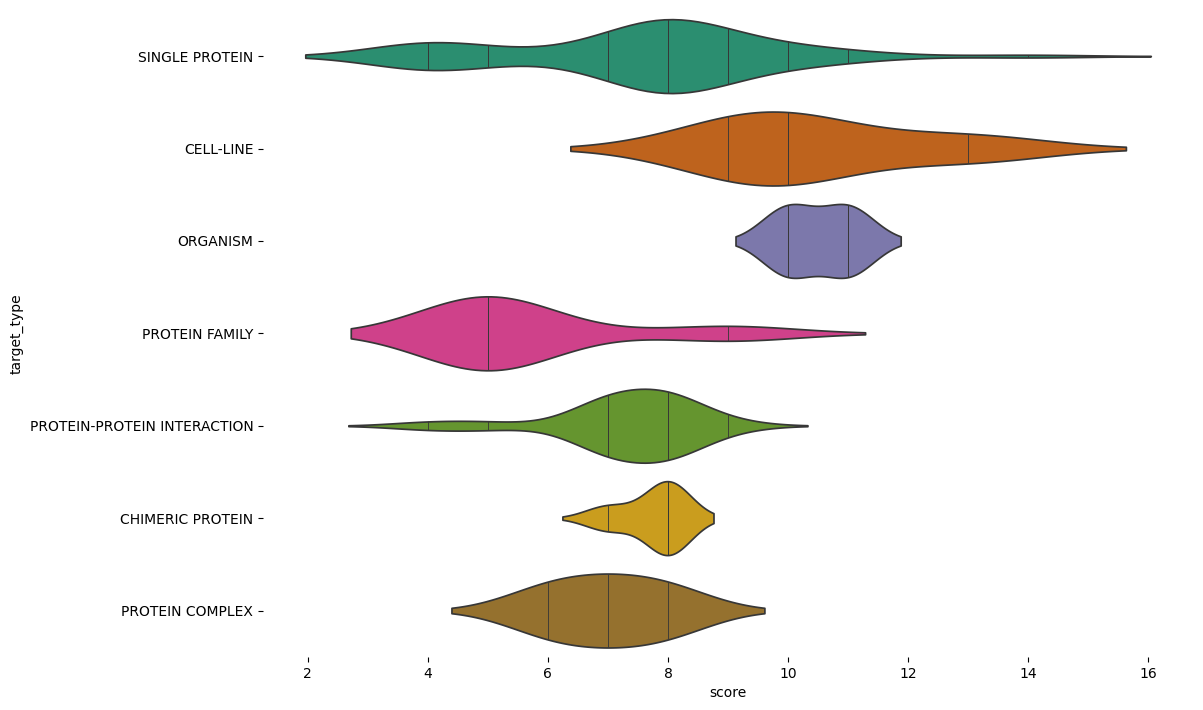

In [25]:
figsize = (12, 1.2 * len(target['target_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(target, x='score', y='target_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

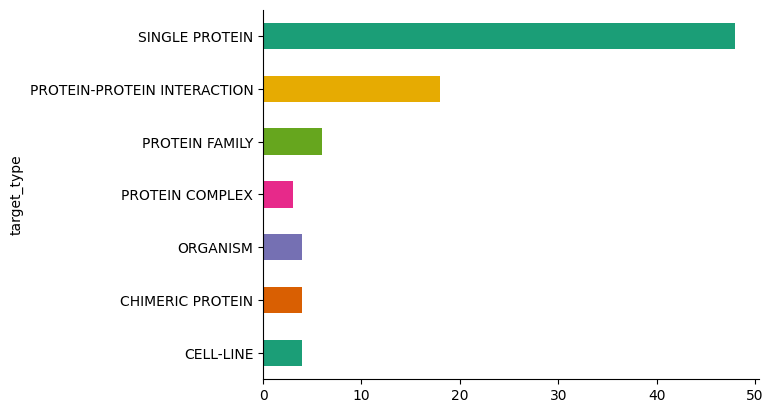

In [26]:
target.groupby('target_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
tar = target.target_chembl_id[6]
tar

'CHEMBL1864'

In [28]:
cor = new_client.new_client.activity.filter(target_chembl_id = tar).filter(type = 'EC50')
cor = pd.DataFrame(cor)

In [29]:
cor.shape

(332, 46)

In [30]:
cor.columns

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [31]:
df = cor[['molecule_chembl_id', 'canonical_smiles', 'type', 'standard_type']]
df

,molecule_chembl_id,canonical_smiles,type,standard_type
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,EC50,EC50
1,CHEMBL125996,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,EC50,EC50
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,EC50,EC50
3,CHEMBL122504,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,EC50,EC50
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,EC50,EC50
...,...,...,...,...
327,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,EC50,EC50
328,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,EC50,EC50
329,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,EC50,EC50
330,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,EC50,EC50


In [32]:
df.dropna()

,molecule_chembl_id,canonical_smiles,type,standard_type
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,EC50,EC50
1,CHEMBL125996,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,EC50,EC50
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,EC50,EC50
3,CHEMBL122504,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,EC50,EC50
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,EC50,EC50
...,...,...,...,...
327,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,EC50,EC50
328,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,EC50,EC50
329,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,EC50,EC50
330,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,EC50,EC50


/usr/local/lib/python3.10/dist-packages/rdkit/Chem/PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,molecule_chembl_id,canonical_smiles,type,standard_type,molecule
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,EC50,EC50,
1,CHEMBL125996,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,EC50,EC50,
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,EC50,EC50,
3,CHEMBL122504,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,EC50,EC50,
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,EC50,EC50,
...,...,...,...,...,...
327,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,EC50,EC50,
328,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,EC50,EC50,
329,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,EC50,EC50,
330,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,EC50,EC50,

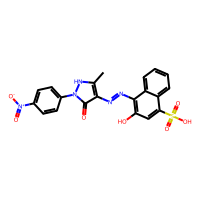
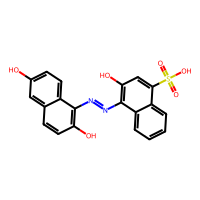
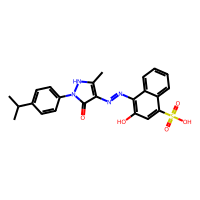
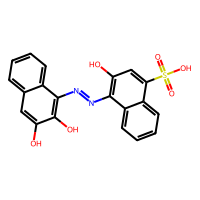
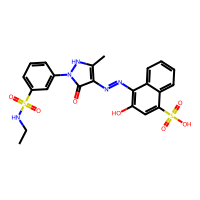
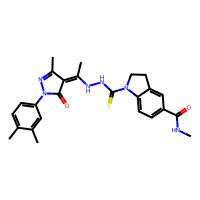
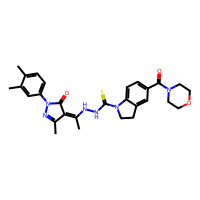
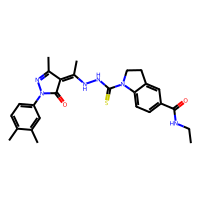
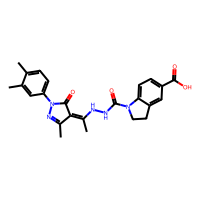
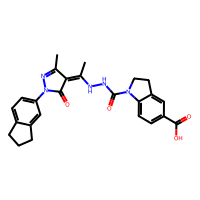

In [33]:
PandasTools.AddMoleculeColumnToFrame(df,'canonical_smiles', 'molecule')
df

Num heavy atoms:  33


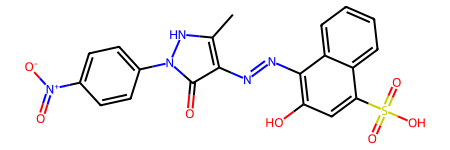

In [34]:
m = Chem.MolFromSmiles('Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c1c(O)cc(S(=O)(=O)O)c2ccccc12')
print('Num heavy atoms: ', m.GetNumHeavyAtoms())

m

In [35]:
MLogP= []
for i in df.molecule:
  desLogP = Descriptors.MolLogP(i)
  MLogP.append(desLogP)

MQed = []
for i in df.molecule:
  desQed = Descriptors.qed(i)
  MQed.append(desQed)


In [36]:
df1 = pd.DataFrame(MLogP, columns = ['LogP'])
df1

,LogP
0,3.90312
1,4.77190
2,5.11832
3,4.77190
4,3.29312
...,...
327,3.10134
328,3.21414
329,3.49144
330,3.27504


In [37]:
df2 = pd.DataFrame(MQed, columns = ['QED'])
df2

,QED
0,0.171379
1,0.283199
2,0.276902
3,0.217802
4,0.208183
...,...
327,0.357080
328,0.355157
329,0.337855
330,0.491646


In [38]:
df3 = pd.concat([df, df1, df2], axis = 1)
df3

,molecule_chembl_id,canonical_smiles,type,standard_type,molecule,LogP,QED
0,CHEMBL3144682,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550ab530>,3.90312,0.171379
1,CHEMBL125996,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550ab0d0>,4.77190,0.283199
2,CHEMBL3144783,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550ab5a0>,5.11832,0.276902
3,CHEMBL122504,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550ab300>,4.77190,0.217802
4,CHEMBL3144667,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550ab1b0>,3.29312,0.208183
...,...,...,...,...,...,...,...
327,CHEMBL1257846,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550dc430>,3.10134,0.357080
328,CHEMBL1257847,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550dc4a0>,3.21414,0.355157
329,CHEMBL1257962,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550dc510>,3.49144,0.337855
330,CHEMBL1257963,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,EC50,EC50,<rdkit.Chem.rdchem.Mol object at 0x785a550dc580>,3.27504,0.491646


In [39]:
df3.dtypes

molecule_chembl_id     object
canonical_smiles       object
type                   object
standard_type          object
molecule               object
LogP                  float64
QED                   float64
dtype: object

In [40]:
df4 = df3.drop(['type','standard_type','molecule_chembl_id', 'molecule'], axis = 1 )
df4

,canonical_smiles,LogP,QED
0,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,3.90312,0.171379
1,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,4.77190,0.283199
2,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,5.11832,0.276902
3,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,4.77190,0.217802
4,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,3.29312,0.208183
...,...,...,...
327,CNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(c...,3.10134,0.357080
328,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=S)N1C...,3.21414,0.355157
329,CCNC(=O)c1ccc2c(c1)CCN2C(=S)NN/C(C)=C1\C(=O)N(...,3.49144,0.337855
330,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=C(/C)NNC(=O)N1C...,3.27504,0.491646


In [41]:
df4.dtypes

canonical_smiles     object
LogP                float64
QED                 float64
dtype: object

In [42]:
df4.describe()

,LogP,QED
count,332.000000,332.000000
mean,5.188847,0.401298
std,0.846993,0.115833
min,2.531400,0.115218
25%,4.735100,0.332906
50%,5.240450,0.397816
75%,5.753900,0.456864
max,7.510800,0.856042


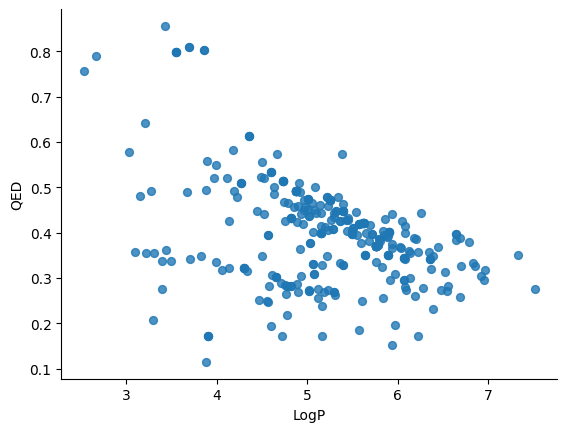

In [43]:
df4.plot(kind='scatter', x='LogP', y='QED', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [44]:
df4['SAS'] = df4['canonical_smiles'].apply(lambda smiles: sascorer.calculateScore(Chem.MolFromSmiles(smiles)))

df4.head(20)

,canonical_smiles,LogP,QED,SAS
0,Cc1[nH]n(-c2ccc([N+](=O)[O-])cc2)c(=O)c1/N=N/c...,3.90312,0.171379,2.996802
1,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)ccc3cc(O)ccc23)c...,4.77190,0.283199,2.780937
2,Cc1[nH]n(-c2ccc(C(C)C)cc2)c(=O)c1/N=N/c1c(O)cc...,5.11832,0.276902,2.954750
3,O=S(=O)(O)c1cc(O)c(/N=N/c2c(O)c(O)cc3ccccc23)c...,4.77190,0.217802,2.796232
4,CCNS(=O)(=O)c1cccc(-n2[nH]c(C)c(/N=N/c3c(O)cc(...,3.29312,0.208183,3.107375
5,CCOC(=O)c1[nH]n(-c2ccc(C(C)(C)C)cc2)c(=O)c1/N=...,5.16070,0.173297,3.083256
6,Cc1[nH]n(-c2ccc(OCc3ccccc3)cc2)c(=O)c1/N=N/c1c...,5.57392,0.185062,2.861492
7,Cc1[nH]n(-c2ccc(C(C)(C)C)cc2)c(=O)c1/N=N/c1c(O...,5.29242,0.269066,2.990525
8,Cc1[nH]n(-c2ccccc2Cl)c(=O)c1/N=N/c1c(O)cc(S(=O...,4.64832,0.301699,2.955161
9,COc1cc(O)c2ccccc2c1/N=N/c1c(O)cc(S(=O)(=O)O)c2...,5.07490,0.309629,2.733743


In [45]:
df4.shape

(332, 4)